In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,3:5].values

In [5]:
#construct a similarity matrix bu using kneighbors graph
from sklearn.neighbors import kneighbors_graph
kn_graph=kneighbors_graph(X,n_neighbors=10,include_self=True)
#creating a symmetric similarity matrix
SM=(kn_graph+kn_graph.T)/2

In [6]:
#compute laplacian matrix
from scipy.sparse.csgraph import laplacian
L=laplacian(SM)

In [7]:
#compute eigen values
from numpy.linalg import eigh
eigenvalues,eigenvectors=eigh(L.toarray())

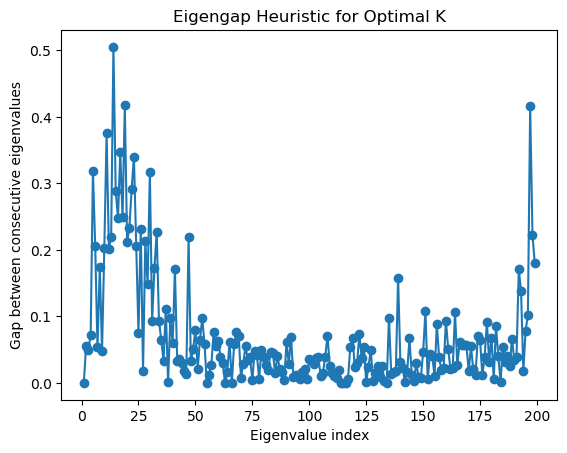

Optimal number of clusters: 14


In [8]:
plt.plot(range(1, len(eigenvalues)), np.diff(eigenvalues),marker='o')
plt.xlabel('Eigenvalue index')
plt.ylabel('Gap between consecutive eigenvalues')
plt.title('Eigengap Heuristic for Optimal K')
plt.show()
optimal_k = np.argmax(np.diff(eigenvalues)) + 1
print("Optimal number of clusters:", optimal_k)


In [44]:
from sklearn.cluster import SpectralClustering
clusmodel=SpectralClustering(n_clusters=optimal_k,assign_labels="kmeans",gamma=0.1)
label=clusmodel.fit_predict(X)

In [45]:
supervised=pd.DataFrame(dataset)

In [46]:
supervised["Cluster Groups"]=label

In [47]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster Groups
0,1,Male,19,15,39,6
1,2,Male,21,15,81,4
2,3,Female,20,16,6,7
3,4,Female,23,16,77,4
4,5,Female,31,17,40,6
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


C:\Anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


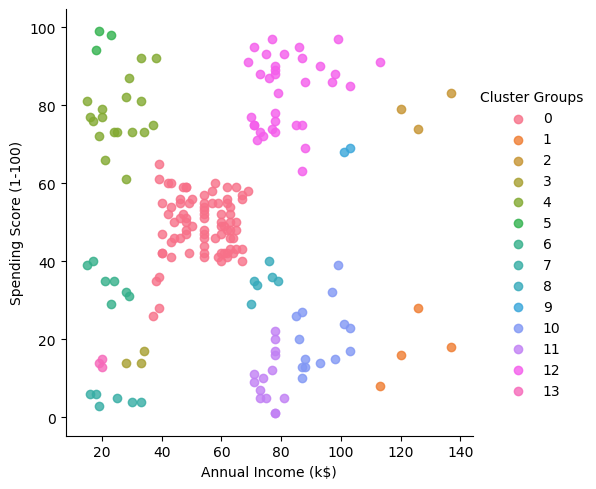

In [48]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)